<a href="https://colab.research.google.com/github/PriyankaMittapelly/SaiPriyanka_INFO5731_-Fall2020/blob/main/5505_logreg_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#IMPORTING THS CSV FILE AND READING THE DATA AND STORING AS A DATAFRAME 

import pandas as pd
import numpy as np
from sklearn import datasets

dataa = pd.read_csv("/content/winequality-red.csv")

dataa

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#CHECKING WHWTHER ANY NULL VARAIABLES ARE PRESENT IN THE DATA 

dataa.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

APPLYING THE CO-RELATION , TO FIND WHAT ARE THE VARIABLES ARE CO-RELATED TO EACH OTHER 

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

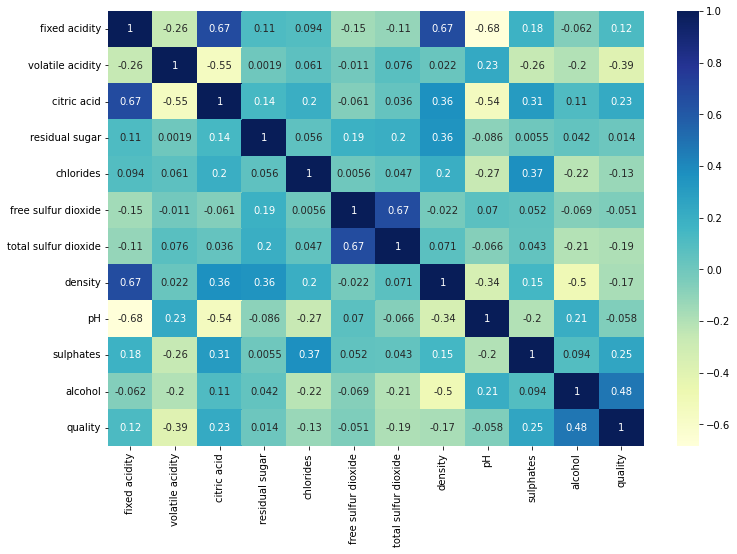

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(dataa.corr())

#plotting co-relation  heatmap

plt.subplots(figsize = (12,8))
dataplot = sns.heatmap(dataa.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Develop and evaluate a logistic model to predict the quality (such as high quality and low quality) of red wines according to the several features and calculating test scores. Write your model in Python.

# converting the independent variable to binary classification to fit the logistic model  , as y will be one dimensional .

As we need to select high quality and low quality
the quality value with 3 and 4 are LOW quality and 5 , 6 , 7 , 8 are HIGH quality

In [5]:
dataa['quality']=np.where(dataa['quality']>5, 1,0)

dataa.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
dataa.iloc[:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Please split 80% data for training and 20% data for testing.

In [8]:
# CREATING X AND Y VARIABLES TO PREDIT THE QUALITY AGAINST THE NUMERIOUS FEATURES

#Assiging the independent variables to X and dependent variable to Y

# Split data for training into (80%) and testing (20%)

from sklearn.model_selection import train_test_split


X =dataa.iloc[:,:-1]

Y =dataa.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split( X , Y , train_size=0.8 , random_state=0)



#X_train.shape,X_test.shape, y_train.shape, y_test.shape


Logistic regression model

In [9]:
#LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='liblinear', C=10.0,random_state=0)

# 5. Fit the model into training set
logmodel.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [16]:
import warnings
warnings.filterwarnings("ignore")

predictions_train = logmodel.predict(X_train)

# assigning the pred value to column nmae pred_valve

dataa.pred['pred_value'] = predictions_train

dataa.pred.head(15)


,0,1,pred_value
0,0.700063,0.299937,0
1,0.413544,0.586456,1
2,0.177537,0.822463,1
3,0.252760,0.747240,1
4,0.498255,0.501745,1
5,0.878129,0.121871,0
6,0.044783,0.955217,1
7,0.508779,0.491221,0
8,0.786895,0.213105,0
9,0.602242,0.397758,0


In [15]:
# Check Accuracy metrics for train


from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_train, predictions_train)) #Classification matrix

Accuracy = accuracy_score(y_train, predictions_train) #Accuracy 
print('Accuracy of the model in the train set: {:.2f}'.format(Accuracy)) 



              precision    recall  f1-score   support

           0       0.73      0.73      0.73       596
           1       0.76      0.76      0.76       683

    accuracy                           0.75      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.75      0.75      0.75      1279

Accuracy of the model in the train set: 0.75
